In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [44]:
# pandas
import pandas as pd
def df2np(df, model,):
    df = df.loc[df['Model'] == model].iloc[0,1:]
    x = df.to_numpy().astype(float).T
    return x

# Load Knee results
df = pd.read_excel('./data/throughput.xlsx')

unt_008M = df2np(df, 'U-Net-8M')
vit_008M = df2np(df, 'ViT-8M/10')
nyt_008M = df2np(df, 'Nyst-8M/10')

unt_031M = df2np(df, 'U-Net-31M')
vit_032M = df2np(df, 'ViT-32M/10')
nyt_032M = df2np(df, 'Nyst-32M/10')

unt_124M = df2np(df, 'U-Net-124M')
vit_060M = df2np(df, 'ViT-60M/10')
nyt_060M = df2np(df, 'Nyst-60M/10')

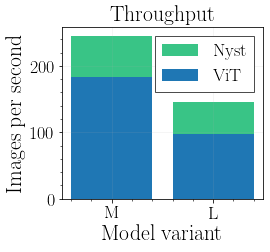

In [45]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots(1, 1, figsize=(0.5*w, 0.7*h))

""" Model styles """

vits = ViT('s', useline=False)
vitm = ViT('m', useline=False)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=False)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

alpha = 1

""" Test """
ax.bar('M',nyt_032M[1], color = '#39c486', alpha=alpha,)
ax.bar('M',vit_032M[1], color = vitm.color, alpha=alpha,)

ax.bar('L',nyt_060M[1], color = '#39c486', alpha=alpha,  label='Nyst')
ax.bar('L',vit_060M[1], color = vitl.color, alpha=alpha,  label='ViT')
ax.set_xlabel('Model variant')
ax.set_ylabel('Images per second')
ax.set_title('Throughput')
ax.legend()

## Save
fig.savefig('./plots/speed_nyst.pdf', format="pdf", bbox_inches = 'tight')

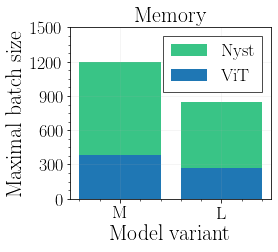

In [46]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots(1, 1, figsize=(0.5*w, 0.7*h))

""" Model styles """
vits = ViT('s', useline=False)
vitm = ViT('m', useline=False)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=False)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

alpha = 1

""" Test """
ax.bar('M',nyt_032M[-1], color = '#39c486', alpha=alpha,)
ax.bar('M',vit_032M[-1], color = vitm.color, alpha=alpha,)

ax.bar('L',nyt_060M[-1], color = '#39c486', alpha=alpha,  label='Nyst')
ax.bar('L',vit_060M[-1], color = vitl.color, alpha=alpha,  label='ViT')
ax.set_xlabel('Model variant')
ax.set_ylabel('Maximal batch size')
ax.set_title('Memory')
ax.yaxis.set_ticks(np.arange(0, 1600, 300))

ax.legend()

## Save
fig.savefig('./plots/memory_nyst.pdf', format="pdf", bbox_inches = 'tight')